## Unsupervised Learning
- Here we don't know the output, means, there is nobody to supervise
- In unsupervised learning, we don't know what we would like to achieve.
- This is similar to human learning, as we also learn ourself
- This is also called Feature Learning / Representation Learning.
- One of the approach in Unsupervised learning is clustering.
- We learn all the features instead of X or y, this is called Feature Learning.
- Our aim is to find groups or clusters. For Clustering, we use "K-Means" algrithm.

### We are doing this for market, so this concept is also called "Marget Segmentation"

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Example.csv')

In [3]:
dataset
# satisfaction is a discrete variable here

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


- Assume that some customers buy 'A' and others buy 'B'
- We may want to analyse this, we just want the different 4 segements
- One thing we want is "Customer Retention"
- These things comes under "Market Segmentation"
- We need to emphasize on "lookalike" people.
- Segmentation can only be done by "feature learning" and come out with some groups called "Clusters".
- For this we will use "K-Means" Algorithm.

In [4]:
sat = dataset['Satisfaction']

In [5]:
loy = dataset['Loyalty']

In [6]:
import matplotlib.pyplot as plt

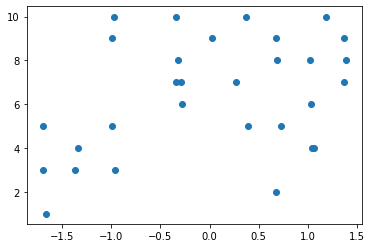

In [7]:
plt.scatter(loy, sat)

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=4)

In [10]:
# We need to fit the whole dataset for analysis
model.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
# To fit and predict in single go
pred = model.fit_predict(dataset)

In [12]:
pred

array([3, 3, 3, 1, 3, 0, 2, 1, 1, 1, 2, 3, 3, 0, 1, 2, 1, 1, 1, 2, 2, 0,
       3, 0, 1, 2, 2, 2, 0, 3])

In [13]:
# These are the number of the cluster to which they belong
# We must know about the number of clusters we want

In [14]:
# Add a column to dataset
dataset['ClusterName'] = pred

In [15]:
dataset

,Satisfaction,Loyalty,ClusterName
0,4,-1.33,3
1,6,-0.28,3
2,5,-0.99,3
3,7,-0.29,1
4,4,1.06,3
5,1,-1.66,0
6,10,-0.97,2
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


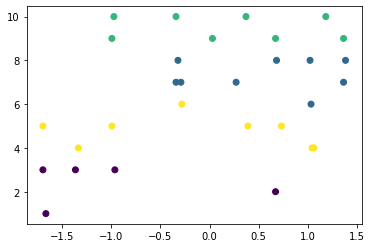

In [16]:
plt.scatter(dataset['Loyalty'], dataset['Satisfaction'], c=dataset['ClusterName'])
# 'c' is for coloring, similar to 'hue' in sns

- But we didn't get better results
- This is due to the scale weightage
- For this, we use "Standardization" or "Normalization"

In [17]:
from sklearn import preprocessing

In [18]:
dataset = preprocessing.scale(dataset)
# Now it becomes a nupy array

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

In [36]:
dataset = pd.read_csv('Example.csv')
data_scaled = sc.fit_transform(dataset)

In [37]:
data_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [38]:
from sklearn.cluster import KMeans

In [39]:
model = KMeans(n_clusters=4)

In [40]:
model.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
pred = model.fit_predict(data_scaled)

In [42]:
pred

array([1, 0, 1, 0, 3, 1, 0, 0, 2, 2, 0, 3, 1, 3, 0, 2, 2, 2, 0, 2, 2, 1,
       3, 1, 3, 0, 2, 0, 1, 3])

In [43]:
dataset_scaled = pd.DataFrame(data_scaled, columns=['Sat', 'Loy'])

In [45]:
dataset_scaled['ClusterName'] = pred

In [46]:
dataset['ClusterName'] = pred

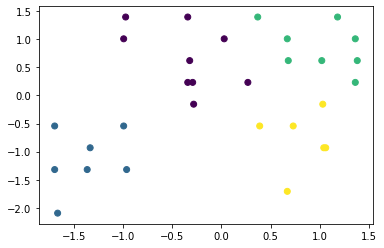

In [47]:
plt.scatter(dataset_scaled['Loy'], dataset_scaled['Sat'], c=dataset_scaled['ClusterName'])